<img src = "Project8Image1.JPG"></img>

## Project : Reducing monthly churn by identifying high risk customers well in advance.
<b>About the Project:</b> The project relates to applying predictive analytics on customer churn. A major telecom company’s postpaid business of voice-only plans is struggling to maintain its strong foothold in local market because of:
- High churn rate amongst customers leading to a revenue decline of ~500k USD every month.
- Decline in overall customer base (high churn rate combined with low acquisition rate), leading to a decline in total market share.<br>

<b>Aim: </b>
<ol><li>Build a classification model to predict churners one month in advance.</li>
<li>Identify key churn drivers.</li></ol><br>
<b>Hypothesis:</b> Company CEO believes that existing models can predict churners precisely, but it’s too late to take any retention actions, as customer usage has significantly declined by then.


## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df = pd.read_csv("Telecom Data.csv")

## Exercise

## Placeholder for your analysis

### Number of Rows and Columns.

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape

(51047, 58)

### Concise Summary (Overview) of the Dataset.

In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [5]:
cust_df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

### Check for Duplicates.

In [6]:
cust_df.CustomerID.nunique() / cust_df.shape[0]

1.0

<mark>__Observation:__
- <b>Our dataset do no have any duplicate data.<b>

### Count Number of Churns (To check whether it is balanced or unbalanced data).

In [7]:
cust_df.Churn.value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In [8]:
# Check by % also.
(cust_df.Churn.value_counts() / cust_df.shape[0]) * 100

No     71.18146
Yes    28.81854
Name: Churn, dtype: float64

<mark>__Observation:__
- Our dataset is an imbalanced dataset.

## <b><span style = 'color: Blue' >Objective/Excercise 1: Perform initial data preparation. </span></b>

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [9]:
zero_revenue = cust_df[cust_df.MonthlyRevenue <= 0.0]
zero_revenue

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
12262,3096670,Yes,0.00,2.0,0.0,0.00,0.0,0.0,NaN,NaN,...,0,0,No,0,30,No,5-Low,Suburban,Other,Unknown
13127,3103410,Yes,0.00,55.0,0.0,0.00,0.0,0.0,NaN,NaN,...,0,4,No,0,10,No,4-Medium,Other,Other,Unknown
26596,3210322,No,-2.52,211.0,0.0,0.33,0.0,0.0,NaN,NaN,...,0,0,No,0,30,No,3-Good,Suburban,Other,Unknown
33352,3265738,No,-5.86,0.0,-5.0,0.00,0.0,0.0,0.0,5.9,...,0,6,No,0,Unknown,No,3-Good,Suburban,Other,Yes
42051,3334666,No,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,No,0,Unknown,No,5-Low,Other,Other,Unknown
48038,3378298,No,-6.17,0.0,-6.0,0.00,0.0,0.0,0.0,6.2,...,0,6,No,0,Unknown,No,7-Lowest,Suburban,Other,No
49920,3391282,No,0.00,1.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,4,No,1,30,No,1-Highest,Suburban,Other,Yes
49946,3391442,No,0.00,1.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,5,No,0,Unknown,No,1-Highest,Other,Other,Unknown
51035,3399894,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,...,0,4,No,0,Unknown,No,2-High,Other,Professional,No


<b> No.of Customers with Zero/Less than 0.0 revenue: 9. </b>

In [10]:
print(cust_df['MonthlyRevenue'].isnull().sum())

156


<b>Removing Rows having 0/less than 0 & NaN  MonthlyRevenue. </b>

In [11]:
cust_df = cust_df[cust_df.MonthlyRevenue > 0.0]

#Excluding Customers with zero Monthly Minutes.
cust_df = cust_df[cust_df["MonthlyMinutes"] > 0]

In [12]:
cust_df.shape

(50162, 58)

### Q1.2 How many columns has missing values percentage > 5%

In [13]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

# To check Null/na in the data.
(cust_df.isnull().sum() / cust_df.shape[0]) * 100

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.344883
PercChangeRevenues           0.344883
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

In [14]:
# Since the count of missing value is negligible (1.778%), we can simply drop those Rows.
cust_df.dropna(axis=0, inplace=True)
cust_df.shape[0]

49078

<mark>__Result:__
    
- Since the percetage of missing number is low, we can drop those rows with missing data.

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

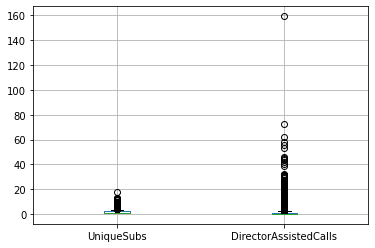

In [15]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.69
0.98,4.0,6.93
0.99,5.0,9.65
1.00,18.0,159.39


<AxesSubplot:>

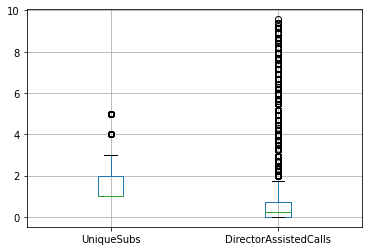

In [16]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
q_value = [i/100 for i in range(95, 101, 1)]
cust_df[cols].quantile(q_value)

# Filtering the cust_df data with 99% value.
cust_df = cust_df[(cust_df.UniqueSubs <= 5) & (cust_df.DirectorAssistedCalls <= 9.6156)]
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

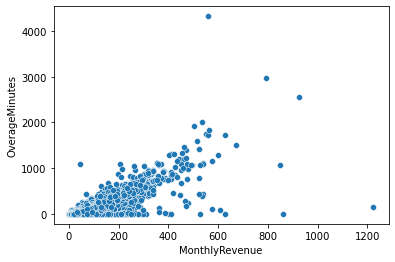

In [17]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

<b> We are going to plot scatterplots for Churned & Non-churned customers.</b>

Text(0.5, 1.0, 'Non-Churned Customers')

<AxesSubplot:title={'center':'Non-Churned Customers'}, xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

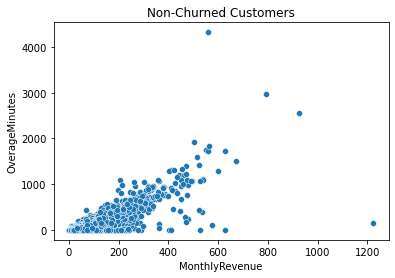

Text(0.5, 1.0, 'Churned Customers')

<AxesSubplot:title={'center':'Churned Customers'}, xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

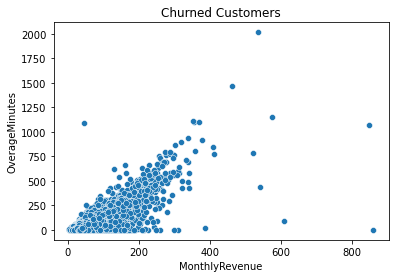

In [18]:
plt.title("Non-Churned Customers")
sns.scatterplot(x = "MonthlyRevenue", y = "OverageMinutes", data = cust_df[cust_df.Churn == "No"])
plt.show()

plt.title("Churned Customers")
sns.scatterplot(x = "MonthlyRevenue", y = "OverageMinutes", data = cust_df[cust_df.Churn == "Yes"])
plt.show()

<mark>__Result:__
    
 - There is a strong positive correlation between MonthlyRevenue & OverageMinutes. So,Yes!! the customers with high
   overage minutes also have high revenue.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

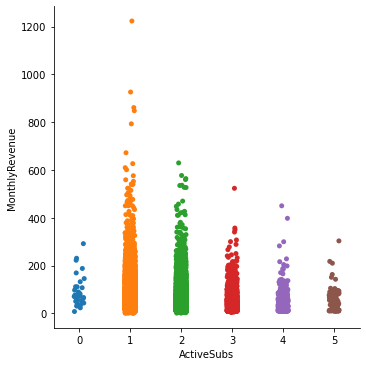

In [19]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x="ActiveSubs", y="MonthlyRevenue", data=cust_df ) 

<mark>__Result:__  
- If the MonthlyRevenue increases, then the number of ActiveSubs decreases. So there is a Negative correlation. 

### Q2.3 Does credit rating have an impact in churn rate?

In [20]:
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda x: x/x.sum(), axis=0)
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda x: x/x.sum(), axis=1)

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.698608,0.7039,0.69738,0.745876,0.785889,0.739905,0.718026
Yes,0.301392,0.2961,0.30262,0.254124,0.214111,0.260095,0.281974


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.161849,0.371062,0.160179,0.109358,0.138555,0.017938,0.041060
Yes,0.177734,0.397318,0.176928,0.094840,0.096086,0.016051,0.041044


<b>Churn vs CreditRating </b>

<AxesSubplot:xlabel='Churn', ylabel='count'>

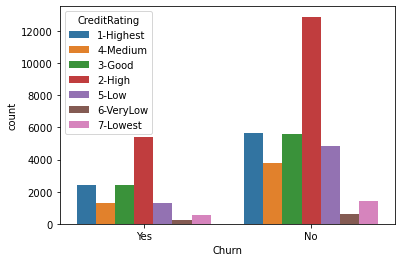

In [21]:
sns.countplot(x="Churn", hue="CreditRating", data=cust_df)

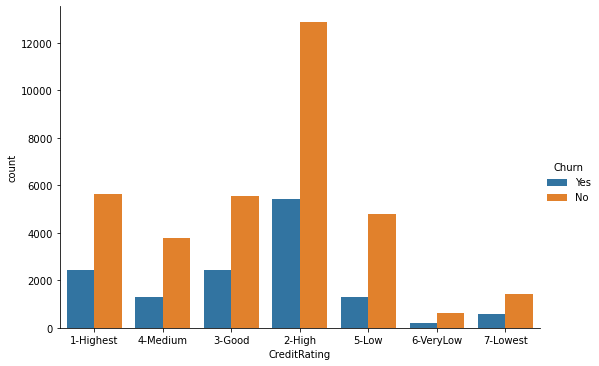

In [22]:
# Type your code here for any additional exploratory analysis (if any)
sns.catplot(x='CreditRating', kind='count', hue='Churn', data=cust_df, height=5, aspect=1.5)

<mark>__Result:__
    
- The above table and plots show that Credit rating does have impact on churn rate. Higher the credit rating, higher the 
churn is. Exceptions are the highest and lowest credit rating.

<b> The customers with highest CreditRanking are churning more. Also, people having lowest CreditRanking are less 
likely to churn. </b>

## Q3. Create additional features to help predict churn

In [23]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge'] = cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minute'] = cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    #3.4 Percent of RoamingCalls minutes over total monthly minutes
    cust_df['perc_Roaming_Calls'] = cust_df['RoamingCalls'] / cust_df['MonthlyMinutes']
    
    #3.5 Percent of DroppedCalls minutes over total monthly minutes
    cust_df['perc_Dropped_Calls'] = cust_df['DroppedCalls'] / cust_df['MonthlyMinutes']
    
    #3.6 Percent of BlockedCalls minutes over total monthly minutes
    cust_df['perc_Blocked_Calls'] = cust_df['BlockedCalls'] / cust_df['MonthlyMinutes']
    
    #3.7 Percent of UnansweredCalls minutes over total monthly minutes
    cust_df['perc_Unanswered_Calls'] = cust_df['UnansweredCalls'] / cust_df['MonthlyMinutes']
    
    #3.8 Percent of CustomerCareCalls minutes over total monthly minutes
    cust_df['perc_Customer_Care_Calls'] = cust_df['CustomerCareCalls'] / cust_df['MonthlyMinutes']
    
    #3.9 Percent of ThreewayCalls minutes over total monthly minutes
    cust_df['perc_Blocked_Calls'] = cust_df['ThreewayCalls'] / cust_df['MonthlyMinutes']
    
    #3.10 Percent of ReceivedCalls minutes over total monthly minutes
    cust_df['perc_Received_Calls'] = cust_df['ReceivedCalls'] / cust_df['MonthlyMinutes']
    
    #3.11 Percent of OutBoundCalls minutes over total monthly minutes
    cust_df['perc_Outbound_Calls'] = cust_df['OutboundCalls'] / cust_df['MonthlyMinutes']
    
    #3.12 Percent of InBoundCalls minutes over total monthly minutes
    cust_df['perc_Inbound_Calls'] = cust_df['InboundCalls'] / cust_df['MonthlyMinutes']
    
    #3.13 Percent of PeakCallsInOut minutes over total monthly minutes
    cust_df['perc_peakCalls_InOut'] = cust_df['PeakCallsInOut'] / cust_df['MonthlyMinutes']
    
    #3.14 Percent of OffPeakCallsInOut minutes over total monthly minutes
    cust_df['perc_Off_PeakCalls_InOut'] = cust_df['OffPeakCallsInOut'] / cust_df['MonthlyMinutes']
    
    return cust_df  


In [24]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df = create_features(cust_df)

In [25]:
# A function that help us to separate the columns like whether they are categorical or continuous.
# It returns a list of categorical & Continuous variable names.

def check_categorical(cust_df):
    colnames = cust_df.columns
    categorical_col = []
    continuous_col = []
    
    for i in colnames:
        if cust_df[i].nunique() < 20:
            if i != "Churn":
                categorical_col.append(i)
        else:
            if i not in ["CustomerID", "ServiceArea"]:
                continuous_col.append(i)
                
    return (categorical_col, continuous_col)

In [26]:
# A function that perform Chisqr test to validate whether the categorical variable is independent of the churn rate or not.
# It helps to filterout the categorical variable that has impact on churn.

def check_categorical_imp(cust_df, categorical_col):
    new_categorical_col = []
    for i in categorical_col:
        if stats.chi2_contingency(pd.crosstab(cust_df.Churn, cust_df[i]))[1] > 0.05:
            pass
        else:
            new_categorical_col.append(i)
                
    return new_categorical_col
    

In [27]:
categorical_col, continuous_col = check_categorical(cust_df)

In [28]:
cust_df.shape

(48374, 71)

In [29]:
cust_df.Churn.value_counts()

No     34730
Yes    13644
Name: Churn, dtype: int64

<mark>__Observation:__
- Already we saw that our dataset in imbalanced. So we have to balance it before we proceed further.

<b>Techniques used for balancing the unbalanced data.</b>
<ol><li><b>Undersampling</b> - Undersampling resamples the majority class points in the data to make them equal to 
the minority class points. The major disadvantage of undersampling is that we do not use a significant chunk of the data, 
which contains some information. Therefore, we are losing information, and as a result, we will not get significant results.
We can avoid this by using a technique called oversampling.</li><br>

<li><b>Oversampling</b> - Oversampling refers to the resampling of the minority class points to equal the 
total number of majority points. Repetition of the minority class points is one such type of oversampling technique.
Providing the large weights to the minority class will give the same result as from that of repetition.</li><br>

<li><b>SMOTE (Synthetic Minority Oversampling Technique)</b> - The problem with repeating the data is that it does not provide 
any extra information. One way to increase the information about the data is by creating synthetic data points. As the name 
suggests, SMOTE is an oversampling technique. It creates new instances between the points of the minority class.</li></ol>


<b>In our program we are using Oversampling to balance our dataset.</b>

In [30]:
# Balancing Churn column using Oversampling technique.
cust_df["Churn"] = cust_df["Churn"].replace(["Yes", "No"], [1, 0])
class_count_0, class_count_1 = cust_df["Churn"].value_counts()

class_0 = cust_df[cust_df["Churn"] == 0]
class_1 = cust_df[cust_df["Churn"] == 1]             # Print shape of the class

class_1_over = class_1.sample(class_count_0, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)

cust_df = test_over
y = cust_df.Churn
y.value_counts() / len(y) * 100

0    50.0
1    50.0
Name: Churn, dtype: float64

<b>Now we have equal numbers of Yes & No. so our data is balanced.</b>

In [31]:
# Filter Categorical & Continuous column names.
# Passes all categorical variable and return only those that have impact on Churn.
important_categorical_col = check_categorical_imp(cust_df, categorical_col)

# Store the Churn flag variable in y.
y = cust_df.Churn
customerid = cust_df.CustomerID
monthlyrevenue = cust_df.MonthlyRevenue

# Keeping the relevant columns from the data.
cust_df = cust_df[important_categorical_col + continuous_col]

In [32]:
cust_df.shape

(69460, 62)

In [33]:
len(important_categorical_col)

24

In [34]:
len(continuous_col)

38

In [ ]:
#categorical_col

In [ ]:
#continuous_col

In [ ]:
#continuous_col.remove("CallForwardingCalls")

In [35]:
cust_df.shape

(69460, 62)

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

<b>Each and every column has data of different range. So bringing all data into same range/scale is scaling of data.</b>

In [36]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Scaling all continuous variable from the dataframe.
cust_df[continuous_col] = sc.fit_transform(cust_df[continuous_col])
cust_df.shape
#Create dummy variables for all categorical variables
cust_df = pd.get_dummies(cust_df, columns=important_categorical_col, drop_first=True)


(69460, 62)

In [37]:
cust_df.shape

(69460, 151)

In [38]:
y.value_counts()

0    34730
1    34730
Name: Churn, dtype: int64

In [39]:
# Check proportion of Churned/Non-churned customers.
y.value_counts() / len(y) * 100

0    50.0
1    50.0
Name: Churn, dtype: float64

In [40]:
len(important_categorical_col)

24

In [41]:
len(continuous_col)

38

In [42]:
# Splitting the customer Churn data into train & Test sets.
cust_df["CustomerID"] = customerid
X = cust_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
y_train.value_counts()

1    24462
0    24160
Name: Churn, dtype: int64

In [44]:
X.shape

(69460, 152)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [45]:
train_custid = X_train.CustomerID
test_custid = X_test.CustomerID
test_monthlyrevenue = X_test.MonthlyRevenue
X_train.drop(["CustomerID"], inplace=True, axis=1)
X_test.drop(["CustomerID"], inplace=True, axis=1)

In [46]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, plot_confusion_matrix, average_precision_score

logistic_classifier = LogisticRegression(random_state=0).fit(X_train, y_train)
logistic_predt_train_output = logistic_classifier.predict_proba(X_train)[:, 1]

<b>The predict_proba() function used above will determine the probability of the target class, not the 
actual class value(0 or 1).</b>

In [47]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
logistic_predt_test_output = logistic_classifier.predict_proba(X_test)[:, 1]

In [48]:
import copy
def efficient_cutoff(actual_value, predicted):
    probability_cutoff = []
    f1_score_value = []
    
    for i in range(0, 101):
        predicted_x = copy.deepcopy(predicted)
        predicted_x[predicted_x >= i / 100] = 1
        predicted_x[predicted_x < i / 100] = 0
        probability_cutoff.append(i/100)
        f1_score_value.append(f1_score(actual_value, predicted_x))
        
    return(probability_cutoff, f1_score_value)
    

Text(0.5, 0, 'Probability Cutoff value for Training data.')

Text(0, 0.5, 'f1_score Train')

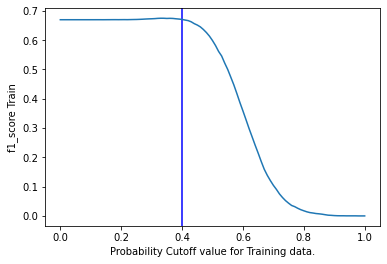

Text(0.5, 0, 'Probability Cutoff value for Test data.')

Text(0, 0.5, 'f1_score Test')

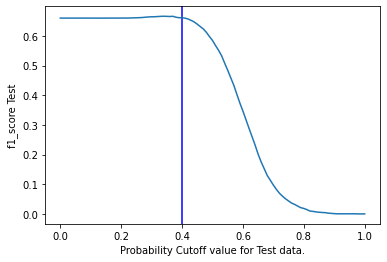

In [49]:
probability_cutoff, f1_score_value = efficient_cutoff(y_train, logistic_predt_train_output)

plt.xlabel("Probability Cutoff value for Training data.")
plt.axvline(x = 0.4, color='b', label='axvline - Full Height')
plt.ylabel("f1_score Train")
plt.plot(probability_cutoff, f1_score_value)
plt.show()

probability_cutoff, f1_score_value = efficient_cutoff(y_test, logistic_predt_test_output)
plt.xlabel("Probability Cutoff value for Test data.")
plt.axvline(x = 0.4, color='b', label='axvline - Full Height')
plt.ylabel('f1_score Test')
plt.plot(probability_cutoff, f1_score_value)
plt.show()

<b> From the above graph, at the threshold 0.4, we have good f1 acuracy. So we select our threshold value as 0.4. 
Hence, if the probability is above 0.4, then we classify as 1, else 0.</b>

In [50]:
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

logistic_predt_test_output[logistic_predt_test_output >= 0.4] = 1
logistic_predt_test_output[logistic_predt_test_output < 0.4] = 0

<b> Evaluating our Model Accuracy by displaying the various evaluation metrics like Gini, Precision, Recall & Confusion Matrix.</b>

In [51]:
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix

print(classification_report(y_test, logistic_predt_test_output))
auc = roc_auc_score(y_test, logistic_classifier.predict_proba(X_test)[:, 1])

print("Gini :{}".format(2*auc - 1))
print("The ROC_AUC of logistic Classifier for Test Data: {}".format(auc))
confusion_matrix(y_test, logistic_predt_test_output)
tn, fp, fn, tp = confusion_matrix(y_test, logistic_predt_test_output).ravel()
print(tn, fp, fn, tp)

              precision    recall  f1-score   support

           0       0.67      0.24      0.35     10570
           1       0.53      0.88      0.66     10268

    accuracy                           0.56     20838
   macro avg       0.60      0.56      0.51     20838
weighted avg       0.60      0.56      0.51     20838

Gini :0.24349385383731148
The ROC_AUC of logistic Classifier for Test Data: 0.6217469269186557


array([[2545, 8025],
       [1229, 9039]], dtype=int64)

2545 8025 1229 9039


<b>Plotting Heatmap of Confusion Matrix</b>

<AxesSubplot:>

Text(33.0, 0.5, 'Actual Value')

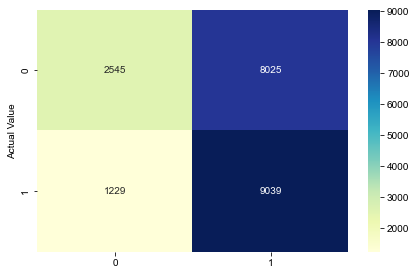

In [52]:
cm = confusion_matrix(y_test, logistic_predt_test_output)
sns.heatmap(pd.DataFrame(cm), cmap='YlGnBu', annot=True, fmt='g')
sns.set(rc = {'figure.figsize':(4.5, 4)})
plt.tight_layout()
plt.ylabel("Actual Value")

<b> True-Positive: cm[0][0], False-Positive: cm[0][1], False-Negative: cm[1][0], True-Negative: cm[1][1] </b>

<b>Plot ROC Curve</b>

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 0, 'True Positive Rate')

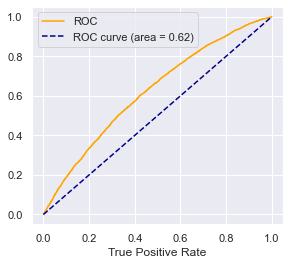

In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='orange', label="ROC")
plt.plot([0,1], [0, 1], color='darkblue', linestyle='dashed', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel("False Positive Rate")
plt.xlabel("True Positive Rate")
plt.legend()
plt.show()

<b>Area under ROC curve is 63%, which is the accuracy of this model.</b>

In [54]:
data = pd.DataFrame({'Actual Value': y_test, 'Predicted_value': logistic_predt_test_output})
data.head(10)

,Actual Value,Predicted_value
44704,1,1.0
32251,1,0.0
43106,0,1.0
14267,1,1.0
26018,1,1.0
17674,0,1.0
43155,0,1.0
46909,0,1.0
38039,0,1.0
49848,1,0.0


### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [55]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=15, min_samples_split=50, random_state=40, criterion="entropy", n_estimators=350, n_jobs = -1)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=50,
                       n_estimators=350, n_jobs=-1, random_state=40)

In [56]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model

rf_train_output = clf.predict_proba(X_train)[:, 1]
rf_test_output = clf.predict_proba(X_test)[:, 1]

Text(0.5, 0, 'Probability Cutoff value for Training data.')

Text(0, 0.5, 'f1_score Training')

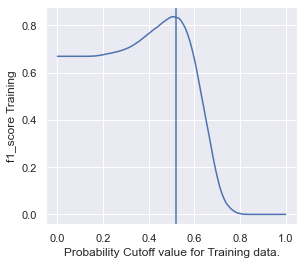

Text(0.5, 0, 'Probability Cutoff value for Test data.')

Text(0, 0.5, 'f1_score Test')

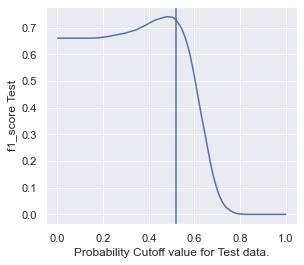

In [57]:
# Plotting the f1_score vs probability_cutoff value
probability_cutoff, f1_score_value = efficient_cutoff(y_train, rf_train_output)
plt.axvline(x = 0.52, color='b', label='axvline-Full height')
plt.xlabel("Probability Cutoff value for Training data.")
plt.ylabel("f1_score Training")
plt.plot(probability_cutoff, f1_score_value)
plt.show()

probability_cutoff, f1_score_value = efficient_cutoff(y_test, rf_test_output)
plt.xlabel("Probability Cutoff value for Test data.")
plt.axvline(x = 0.52, color='b', label='axvline - Full Height')
plt.ylabel('f1_score Test')
plt.plot(probability_cutoff, f1_score_value)
plt.show()

In [58]:
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

rf_test_output[rf_test_output >= 0.5] = 1
rf_test_output[rf_test_output < 0.5] = 0


In [59]:
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix


print(classification_report(y_test, rf_test_output))
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

print("Gini :{}".format(2*auc - 1))
print("The ROC_AUC of Random Forest Classifier for Test Data: {}".format(auc))
confusion_matrix(y_test, rf_test_output)
tn, fp, fn, tp = confusion_matrix(y_test, rf_test_output).ravel()
print(tn, fp, fn, tp)

              precision    recall  f1-score   support

           0       0.77      0.65      0.70     10570
           1       0.69      0.80      0.74     10268

    accuracy                           0.72     20838
   macro avg       0.73      0.72      0.72     20838
weighted avg       0.73      0.72      0.72     20838

Gini :0.6178639702887867
The ROC_AUC of Random Forest Classifier for Test Data: 0.8089319851443934


array([[6864, 3706],
       [2069, 8199]], dtype=int64)

6864 3706 2069 8199


<b>Generate Heatmap of Confusion Matrix.</b>

<AxesSubplot:>

Text(17.0, 0.5, 'Actual Value')

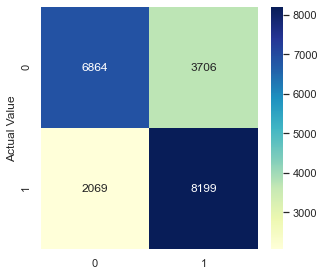

In [60]:
cm = confusion_matrix(y_test, rf_test_output)
sns.heatmap(pd.DataFrame(cm), cmap='YlGnBu', annot=True, fmt='g')
plt.tight_layout()
plt.ylabel("Actual Value")

<b> True-Positive: cm[0][0], False-Positive: [0][1], False-Negative: [1][0], True-Negative: [1][1] </b>

<b>Plot the ROC Curve for Random Forest Model.</b>

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 0, 'True Positive Rate')

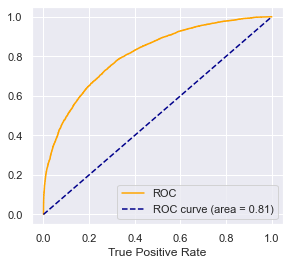

In [61]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='orange', label="ROC")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel("False Positive Rate")
plt.xlabel("True Positive Rate")
plt.legend()
plt.show()

<b> The area under ROC curve is 80%, which is the accuracy of this model.</b>

In [62]:
data = pd.DataFrame({'Actual Value': y_test, 'Predicted_value': rf_test_output})
data.head(12)

,Actual Value,Predicted_value
44704,1,1.0
32251,1,1.0
43106,0,0.0
14267,1,1.0
26018,1,0.0
17674,0,0.0
43155,0,0.0
46909,0,0.0
38039,0,0.0
49848,1,1.0


<mark>__Result:__
    
The Random Forest model has better predictive capabilty and the Precision, Recall, ConfusionMatrix & AUC values also suggest
the same thing. Hence, we selected the cutoff value to maximize the f1 score.

### Q4.3 Identify most important features impacting churn

<Figure size 360x720 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance Plot')

<AxesSubplot:title={'center':'Feature Importance Plot'}>

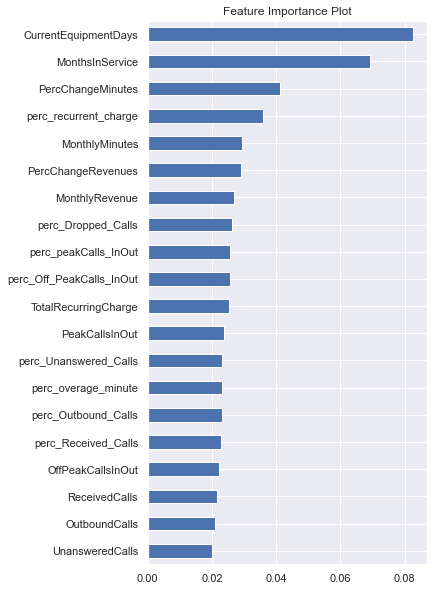

In [63]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(5, 10))
plt.title("Feature Importance Plot")
feature_imp.nlargest(20).sort_values(ascending=True).plot(kind='barh')

<b>Top 5 features are: CurrentEquipmentDays, MonthsInService, PercchangeMinutes, perc_recurrent_charge & PercChangeRevenues.</b>